In [1]:
from datetime import date
from src.market import Market
from src.portfolio import Portfolio
from src.analysis import Analysis, Benchmark, Metric
from src.rebalance import Rebalance
from src.strategy import StopGainAndLoss
from src.backtest import BackTest
from src.factor.sales_growth import SalesGrowthFactor
from src.fund_universe import SECTOR_ETF

In [2]:
start_date = date.fromisoformat("2013-01-01")
end_date = date.fromisoformat("2023-10-01")
security_universe = SECTOR_ETF

market = Market(security_universe, start_date, end_date)

In [ ]:
### Long factor
long_factor = SalesGrowthFactor(security_universe, start_date, end_date, "long", 12)
long_position = long_factor.get_position(start_date)
long_portfolio = Portfolio(100.0, start_date, end_date)
long_factor.set_portfolio_at_start(long_portfolio, long_position)

blacklist = []
strategy = StopGainAndLoss(long_portfolio, blacklist)
strategy.set_limit(0.5, 0.3)
rebalance = Rebalance(60, long_portfolio, long_factor, blacklist)

backtest = BackTest(long_portfolio, strategy, market, rebalance)
backtest.run()

# print(long_portfolio.value_book)

In [ ]:
### Short factor
short_factor = SalesGrowthFactor(security_universe, start_date, end_date, "short", 12)
short_position = short_factor.get_position(start_date)
short_portfolio = Portfolio(100.0, start_date, end_date)
short_factor.set_portfolio_at_start(short_portfolio, short_position)

blacklist = []
strategy = StopGainAndLoss(short_portfolio, blacklist)
strategy.set_limit(0.5, 0.3)
rebalance = Rebalance(60, short_portfolio, short_factor, blacklist)

backtest = BackTest(short_portfolio, strategy, market, rebalance)
backtest.run()

# print(short_portfolio.value_book)

portfolio annulized return: 0.10904386300150382
portfolio annulized return relative to benchmark: 0.0036333638633179177
information ratio: 8.745295681878982e-06


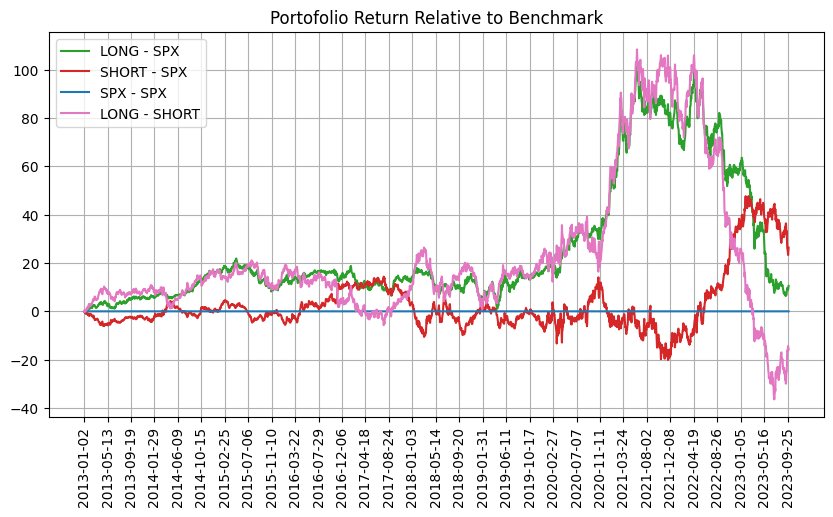

In [5]:
### plot
import matplotlib.pyplot as plt

benchmark = Benchmark("^SPX", start_date, end_date).get_performance()

metric = Metric(long_portfolio, benchmark)
print(f"portfolio annulized return: {metric.annualized_return()}")
print(
    f"portfolio annulized return relative to benchmark: {metric.annualized_return_relative_to_benchmark()}"
)
print(f"information ratio: {metric.information_ratio()}")

analysis = Analysis(
    long_portfolio,
    short_portfolio,
    benchmark,
    "SPX",
)
analysis.draw()

plt.show()